In [ ]:
# imports
import scipy
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(1234)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preprocessing

In [ ]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/data2.csv')

In [ ]:
df.head()

,Year,Month,time index,FFR,GDP,MS,UI,Gas Price,S&P 500
0,1991,Jan,1,1.545946,-1.589107,-1.150451,0.383277,1.000,343.9
1,1991,Feb,2,1.488320,-1.589107,-1.145532,0.509800,1.094,367.1
2,1991,Mar,3,1.395232,-1.566827,-1.141280,0.446539,1.040,375.2
3,1991,Apr,4,1.337606,-1.566827,-1.137917,0.573061,1.076,375.4
4,1991,May,5,1.390799,-1.566827,-1.135981,0.573061,1.126,389.8


In [ ]:
# Remove whitespaces
df.columns = df.columns.str.strip()

In [ ]:
# Drop time index and Year columns
df= df.drop(['time index','Year'], axis =1)

Multiple Regression (all variables)

In [ ]:
df = df.rename(columns = {'FFR':'FFR', 'GDP':'GDP', 'MS':'MS',
                          'UI':'UI', 'Gas Price':'GP','S&P 500':'SP'})
df

,Month,FFR,GDP,MS,UI,GP,SP
0,Jan,1.545946,-1.589107,-1.150451,0.383277,1.000,343.9
1,Feb,1.488320,-1.589107,-1.145532,0.509800,1.094,367.1
2,Mar,1.395232,-1.566827,-1.141280,0.446539,1.040,375.2
3,Apr,1.337606,-1.566827,-1.137917,0.573061,1.076,375.4
4,May,1.390799,-1.566827,-1.135981,0.573061,1.126,389.8
...,...,...,...,...,...,...,...
319,Aug,-0.714772,1.818101,2.148792,-1.134993,2.380,2476.4
320,Sep,-0.714772,1.815304,2.165853,-1.198254,2.645,2476.6
321,Oct,-0.710340,1.855704,2.174257,-1.198254,2.505,2529.1
322,Nov,-0.648281,1.869676,2.191773,-1.198254,2.564,2579.4


In [ ]:
from sklearn import linear_model
# Specify Dependent and Independent variables
X = df[['FFR', 'GDP','MS','UI','GP']]
y = df['SP']

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
# Print Coefficients of regression
print(regr.coef_)

[  38.86014536  220.31891544  313.13798959 -188.78174398  -11.9822075 ]


In [ ]:
#predict S&P given values for the independent variables
predictedSP = regr.predict([[-0.45,1.95,2.25,2.50,2.555]])
print(predictedSP)

[1827.29136444]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Correlation Matrix and Heat Map

In [ ]:
corrM = df.corr()
corrM

,FFR,GDP,MS,UI,GP,SP
FFR,1.000000,-0.732001,-0.767220,-0.551913,-0.637817,-0.473403
GDP,-0.732001,1.000000,0.974384,0.087502,0.813867,0.887676
MS,-0.767220,0.974384,1.000000,0.129799,0.755577,0.875745
UI,-0.551913,0.087502,0.129799,1.000000,0.356004,-0.290270
GP,-0.637817,0.813867,0.755577,0.356004,1.000000,0.589144
SP,-0.473403,0.887676,0.875745,-0.290270,0.589144,1.000000


Correlation heat map

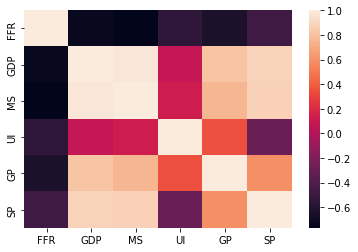

In [ ]:
sns.heatmap(df.corr());

Variance inflation factor calculation

In [ ]:
vifs = pd.Series(np.linalg.inv(df.corr().values).diagonal(), index=corrM.index)
vifs

FFR     5.567455
GDP    41.132547
MS     32.293923
UI      5.491473
GP      5.462534
SP     16.874964
dtype: float64

VIF calculation for GDP using R^2

In [ ]:
X_2 = df[['FFR','MS','UI','GP']]
y_2 = df['GDP']

regr = linear_model.LinearRegression()
regr.fit(X_2, y_2)
R_squared1 = regr.score(X_2, y_2)
R_squared1


0.9738425653572046

In [ ]:
vif1= 1/(1-R_squared1)
vif1

38.23004869001677

VIF calculation for MS using R^2

In [ ]:
X_3 = df[['FFR','GDP','UI','GP']]
y_3 = df['MS']

regr = linear_model.LinearRegression()
regr.fit(X_3, y_3)
R_squared2 = regr.score(X_3, y_3)
R_squared2

0.9621651418396006

In [ ]:
vif2= 1/(1-R_squared2)
vif2

26.430652805953123

Multiple Regression (2nd Model)

In [ ]:
X = df[['FFR','MS','UI','GP']]
y = df['SP']

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
# Print Coefficients of regression
print(regr.coef_)

[  19.37161483  474.15710744 -221.38984682   50.24084066]


In [ ]:
#predict S&P given values for the independent variables
predictedSP = regr.predict([[-0.45,2.25,2.50,2.555]])
print(predictedSP)

[1720.22678049]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Multiple Regression as a machine learning algorithm

In [ ]:
X = df[['FFR','MS','UI','GP']]
y = df['SP']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
pd.set_option('display.max_rows', None)
print(y_test)

295    1970.1
65      670.6
15      415.0
274    1806.6
140     815.3
153    1050.7
101    1372.7
234    1107.5
63      654.2
159    1107.3
184    1270.1
181    1280.7
97     1238.3
219     872.7
215     903.0
64      669.1
26      451.7
256    1309.9
92     1017.0
108    1394.5
212    1164.2
66      640.0
161    1140.8
188    1335.8
81      914.6
167    1211.9
179    1248.3
305    2099.3
7       395.4
6       387.8
218     793.6
259    1406.5
22      431.4
170    1180.6
21      418.7
269    1609.8
55      561.9
12      408.8
122    1160.3
116    1436.5
103    1320.4
166    1173.8
150     990.3
60      636.0
136    1067.1
142     936.3
132    1130.2
233    1031.1
198    1455.2
164    1114.6
289    2105.2
283    2004.1
59      615.9
68      687.3
52      533.4
135    1076.9
254    1408.5
56      584.4
290    2067.6
230    1171.2
17      408.2
1       367.1
74      757.1
8       387.9
209    1276.7
Name: SP, dtype: float64


In [ ]:
# instantiate 
model =linear_model.LinearRegression()
# fit
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
y_pred

array([2114.72035172,  771.12380606,  401.72784908, 1743.2116705 ,
        992.70804458, 1033.40999282, 1038.4219533 ,  977.09579958,
        749.81873618, 1103.83915792, 1445.58565451, 1379.73910896,
       1023.68636906,  917.54491848, 1090.21280099,  795.34739202,
        458.82963357, 1409.38744081,  972.18073999, 1108.22695264,
       1344.17595335,  822.64543157, 1133.15468484, 1479.02812395,
        931.71342337, 1189.11399792, 1363.59024711, 2226.23196736,
        516.97671293,  518.98794166,  957.79577369, 1493.91107489,
        423.30534274, 1228.06411688,  426.16997767, 1638.37931157,
        735.61223242,  430.63455662, 1128.69621979, 1189.66752745,
       1066.46506553, 1181.27151758,  995.32243331,  747.85109718,
        954.93564943,  956.93945283,  943.80682182,  983.01515363,
       1530.71929237, 1147.67913233, 1993.93174041, 1937.69893999,
        736.04119721,  811.76564751,  733.5688324 ,  952.51954388,
       1402.75962563,  749.62379687, 2014.58423643,  906.91245

In [ ]:
# print y-intercept
print(model.intercept_)

# Print the beta coeficients in same order as passed
print(model.coef_)

1080.7123745888214
[  32.17701784  477.12798327 -214.75998073   55.77796656]


In [ ]:
# model evaluation
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.9163547691045336


Model Evaluation

In [ ]:
# Import metrics library
from sklearn import metrics

# Print result of MAE
MAE = metrics.mean_absolute_error(y_test,y_pred)

# Print result of MSE
MSE = metrics.mean_squared_error(y_test,y_pred)

# Print result of RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))


In [ ]:
print(MAE)
print(MSE)
print(RMSE)

105.82025066319844
17390.609564005583
131.87346042326175


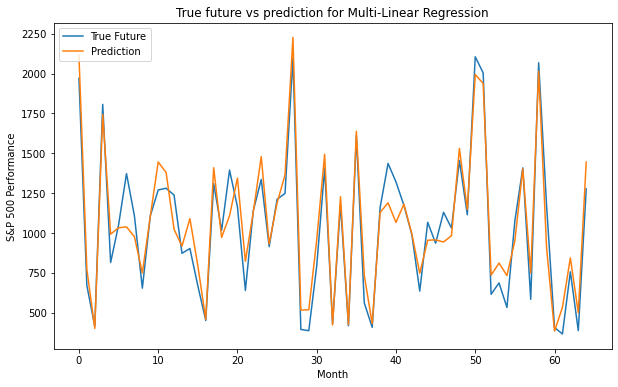

In [ ]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(y_pred)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(y_pred),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Month')
    plt.ylabel('S&P 500 Performance')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/predic_'+model_name+'.jpg', format='jpg', dpi=1000)
    
    
plot_future(y_pred, 'Multi-Linear Regression', y_test)